In [42]:
import sys
sys.path.append("../sortingAlgorithms")

import random
from time import sleep
from typing import List

from time_test import timer
from insertion_sort import insertion_sort

from tqdm import tqdm

import matplotlib.pyplot as plt

In [34]:
def create_random_array(N:int, val_from:int = 100, val_to:int = 10_000) -> List:
    return [random.randint(val_from, val_to) for _ in range(N)]
'--------------------------------------------------------------------------------'

'--------------------------------------------------------------------------------'

In [40]:
@timer
def insertion_sort_time(the_list: List, list_length: int):
    insertion_sort(the_list, list_length)

In [43]:
Xn = [10_000*i for i in range(1, 11)]
yn = []
for one_list in tqdm([create_random_array(num_items) for num_items in Xn]):
    yn.append(insertion_sort_time(one_list, len(one_list)))

100%|██████████| 10/10 [09:31<00:00, 57.20s/it] 


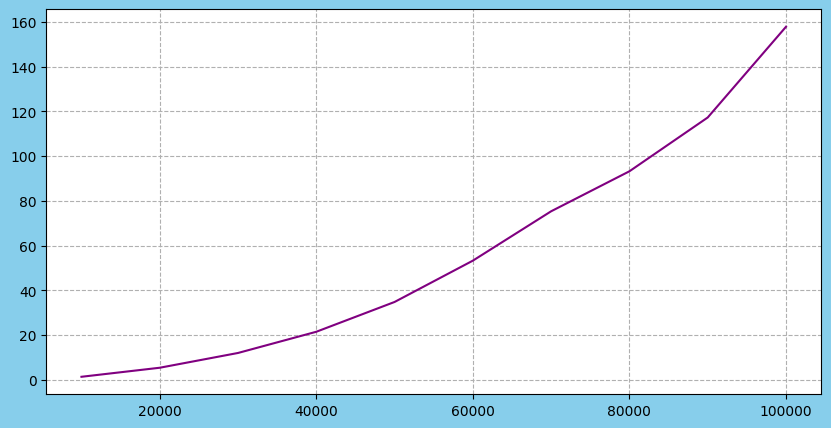

In [44]:
some_figure = plt.figure(figsize=(10, 5), facecolor='skyblue')
some_ax = some_figure.add_subplot()
some_ax.grid(linestyle = '--')

some_ax.plot(Xn, yn, color='purple')